In [2]:
import pyautogui as pag
import pytesseract as pt
from PIL import Image,ImageDraw
pt.pytesseract.tesseract_cmd = r'D:\Software\Tesseract\tesseract.exe'

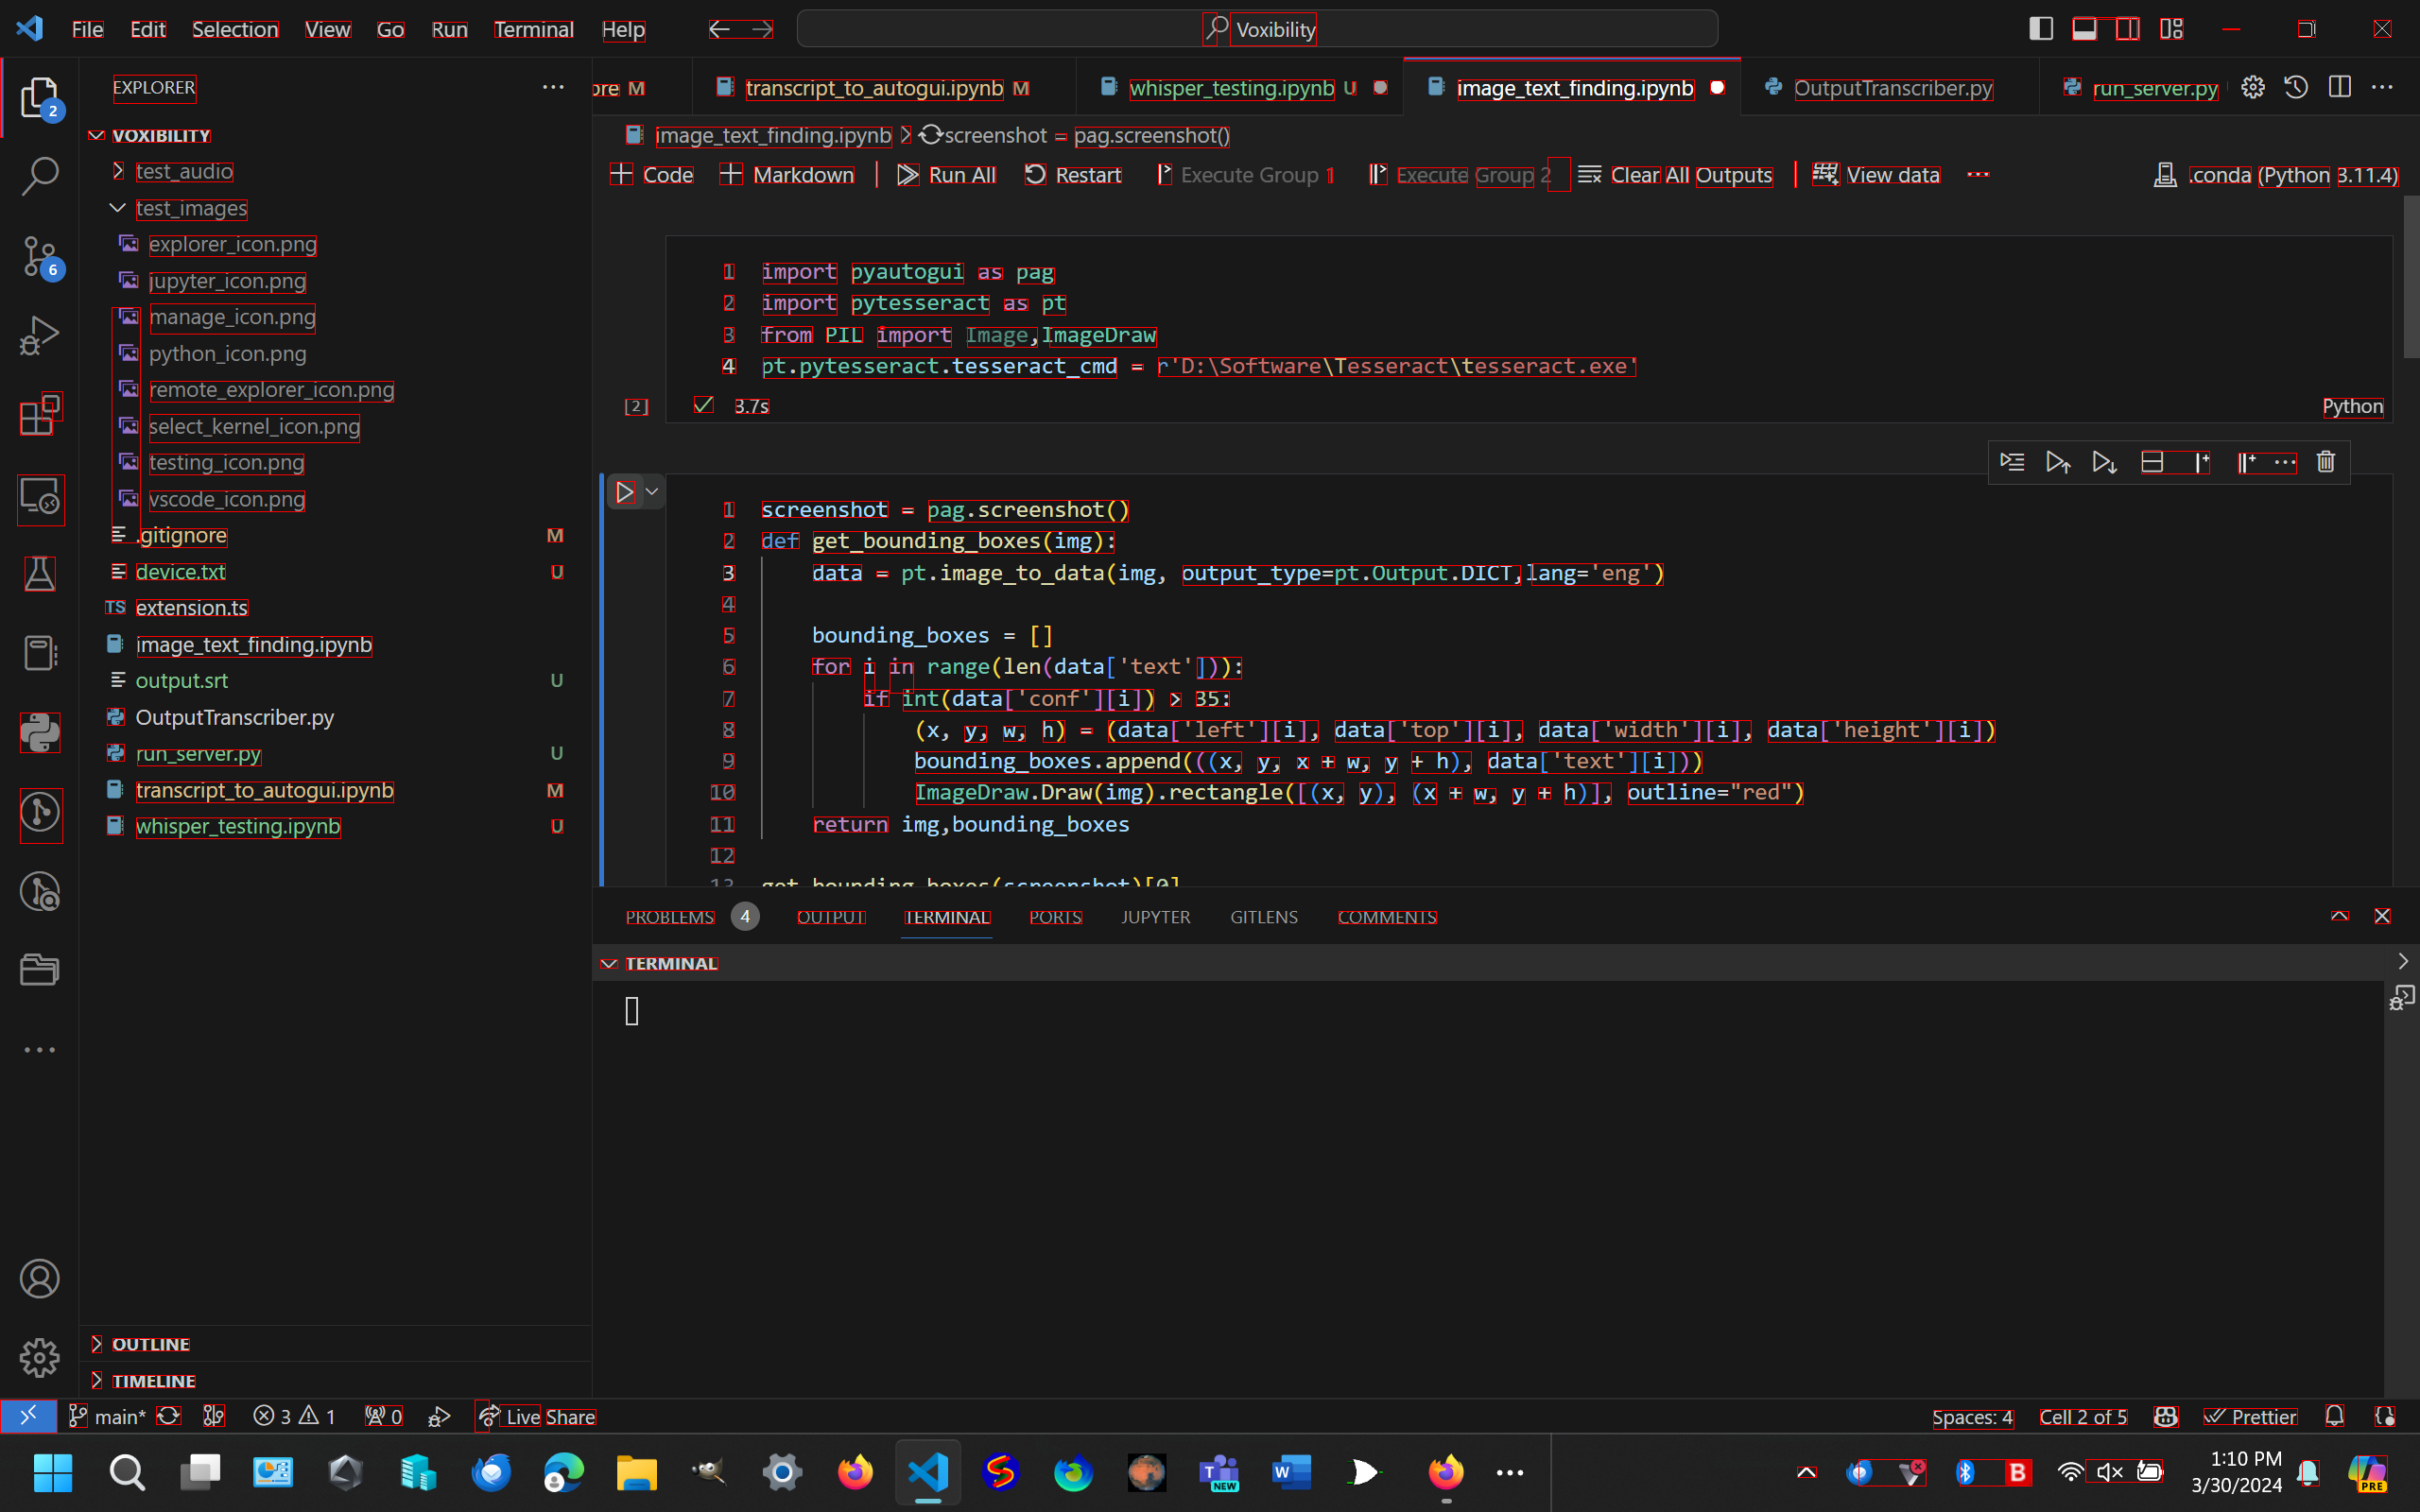

In [3]:
screenshot = pag.screenshot()
def get_bounding_boxes(img):
    data = pt.image_to_data(img, output_type=pt.Output.DICT,lang='eng',config='--psm 11')
    
    bounding_boxes = []
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 40:
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            bounding_boxes.append(((x, y, x + w, y + h), data['text'][i]))
            ImageDraw.Draw(img).rectangle([(x, y), (x + w, y + h)], outline="red")
    return img,bounding_boxes

get_bounding_boxes(screenshot)[0]

In [6]:
import pyautogui as pag
from PIL import Image
zoom_level=1
zoom_factor=1.2**zoom_level#VSCode only changes icons by 20% each time
image = Image.open('test_images/vscode_icon.png')
image = image.resize((int(image.width  * zoom_factor), int(image.height * zoom_factor)))
# Locate the image on the screen
try:
    image_location = pag.locateOnScreen(image,confidence=.75,grayscale=True)
    #so that icons that have numbers appear over them show up
    x, y = pag.center(image_location)
    pag.moveTo(x, y)
except pag.ImageNotFoundException:
    print("Image not found")
image.close()

In [46]:
import pygetwindow as gw

# Get the currently focused window
focused_window = gw.getActiveWindow()

# Get the bounding box of the focused window
bounding_box = focused_window.left, focused_window.top, focused_window.width, focused_window.height

# Print the bounding box
print("Bounding Box:", bounding_box)


Bounding Box: (-12, -12, 2584, 1540)
